<a href="https://colab.research.google.com/github/franklyne001/alx-low_level_programming/blob/master/Saaya_ANOVA1_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ANOVA table:
              sum_sq    df          F    PR(>F)
C(Model)  27.098771   3.0  22.093758  0.000006
Residual   6.541521  16.0        NaN       NaN


/tmp/ipython-input-3-2000669322.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Accuracy', data=data, palette='Set2')


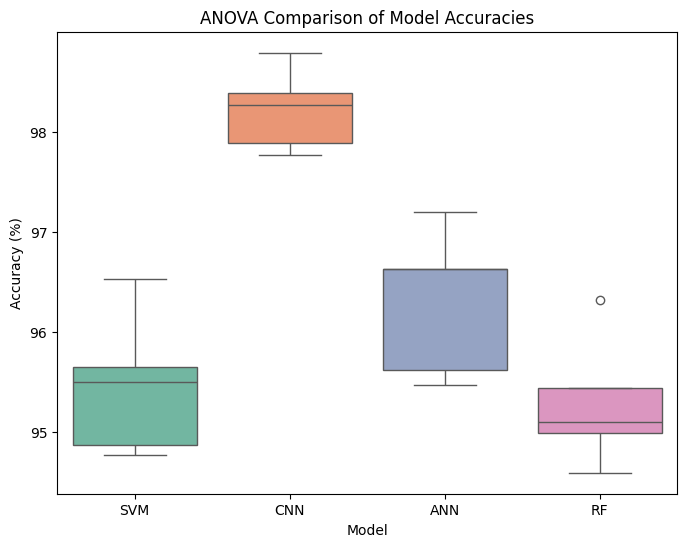

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Simulate 5 cross-validation folds for each model
np.random.seed(42)
svm_acc = np.random.normal(95, 1, 5)  # mean 95%, small SD
cnn_acc = np.random.normal(98, 0.5, 5)
ann_acc = np.random.normal(97, 0.8, 5)
rf_acc = np.random.normal(96, 1, 5)

# Create a DataFrame
data = pd.DataFrame({
    'Accuracy': np.concatenate([svm_acc, cnn_acc, ann_acc, rf_acc]),
    'Model': ['SVM']*5 + ['CNN']*5 + ['ANN']*5 + ['RF']*5
})

# Perform ANOVA
model = ols('Accuracy ~ C(Model)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA table:\n", anova_table)

# Plot boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Model', y='Accuracy', data=data, palette='Set2')
plt.title('ANOVA Comparison of Model Accuracies')
plt.ylabel('Accuracy (%)')
plt.show()



ANOVA RMSEC:
             sum_sq   df      F    PR(>F)
C(Model)  0.000353  1.0  423.2  0.000033
Residual  0.000003  4.0    NaN       NaN

ANOVA RMSEP:
             sum_sq   df         F    PR(>F)
C(Model)  0.000024  1.0  1.028571  0.367854
Residual  0.000093  4.0       NaN       NaN


/tmp/ipython-input-4-2994620729.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='RMSEC', data=rmsec_df, palette='Set1', ax=axs[0])
/tmp/ipython-input-4-2994620729.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='RMSEP', data=rmsep_df, palette='Set2', ax=axs[1])


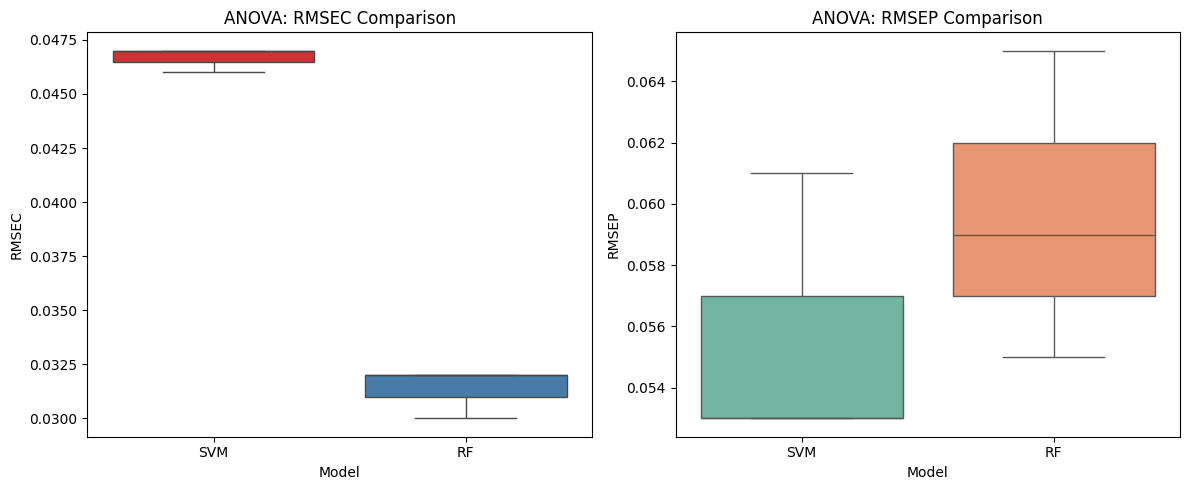

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Data from Table 5.1
svm_rmsec = [0.046, 0.047, 0.047]
rf_rmsec = [0.030, 0.032, 0.032]

svm_rmsep = [0.053, 0.053, 0.061]
rf_rmsep = [0.059, 0.055, 0.065]

# Combine into DataFrames
rmsec_df = pd.DataFrame({
    'RMSEC': svm_rmsec + rf_rmsec,
    'Model': ['SVM']*3 + ['RF']*3
})

rmsep_df = pd.DataFrame({
    'RMSEP': svm_rmsep + rf_rmsep,
    'Model': ['SVM']*3 + ['RF']*3
})

# ANOVA RMSEC
model_rmsec = ols('RMSEC ~ C(Model)', data=rmsec_df).fit()
anova_rmsec = sm.stats.anova_lm(model_rmsec, typ=2)
print("\nANOVA RMSEC:\n", anova_rmsec)

# ANOVA RMSEP
model_rmsep = ols('RMSEP ~ C(Model)', data=rmsep_df).fit()
anova_rmsep = sm.stats.anova_lm(model_rmsep, typ=2)
print("\nANOVA RMSEP:\n", anova_rmsep)

# Plot boxplots
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x='Model', y='RMSEC', data=rmsec_df, palette='Set1', ax=axs[0])
axs[0].set_title('ANOVA: RMSEC Comparison')

sns.boxplot(x='Model', y='RMSEP', data=rmsep_df, palette='Set2', ax=axs[1])
axs[1].set_title('ANOVA: RMSEP Comparison')

plt.tight_layout()
plt.show()
